My first competition! Feel welcome to make any corrections and give me advices.

This is not the version used to reach the top 8%. I made some changes after getting the result and forgot to save a copy of it.

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

df_test = test.copy()

datasets = [df_train, df_test]

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
for df in datasets:
    df.set_index('PassengerId',inplace=True)

In [5]:
df_train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [6]:
df_train.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [7]:
df_train.SibSp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [8]:
df_train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

38% of the passangers in this dataset died in the accident. About 50% of them were in the lower class.


Analyze the Data

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


def boxplot(col_x, col_y,hue):
    x = df_train[col_x]
    hue = df_train[hue]
    y = df_train[col_y]
    ax = sns.boxplot(x = x, y = y, hue = hue, palette = 'husl')
    ax.set_title(f'{col_x} per {col_y}')  
    plt.show()

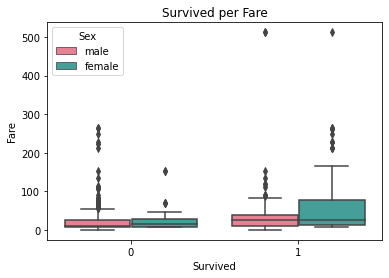

In [10]:
boxplot('Survived', 'Fare', 'Sex')

Although the display is not very clear, it is noticeble that passangers who survived tended to had paid a higher fare. 

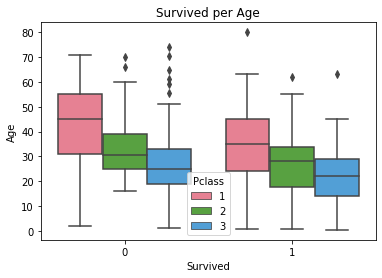

In [11]:
boxplot('Survived','Age','Pclass')

In [12]:
df_survived = df_train.query('Survived ==1')
df_survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [13]:
df_not_survived = df_train.query('Survived == 0')
df_not_survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


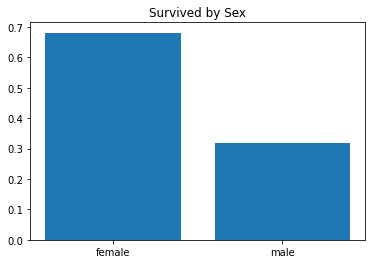

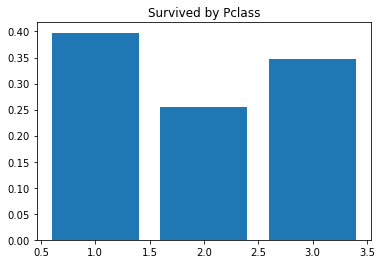

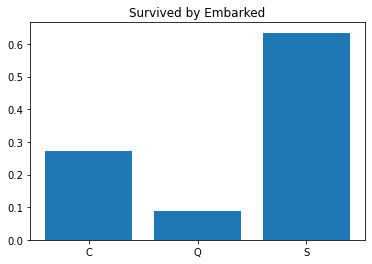

In [14]:
def survived_per_class(column):
    data = df_train.groupby(column)['Survived'].sum()/len(df_survived)
    plt.bar(data.index, data.values)
    plt.title('Survived by '+ column)
    plt.show()
    
survived_per_class('Sex')

survived_per_class('Pclass')

survived_per_class('Embarked')

Now let's analyze by relative quantities

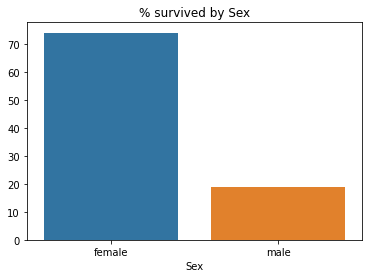

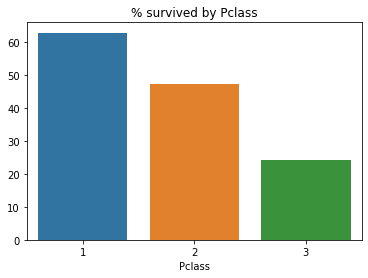

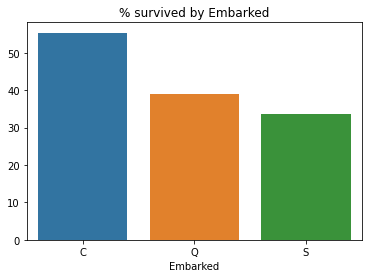

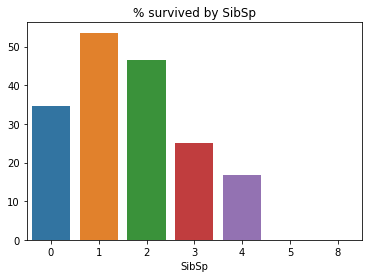

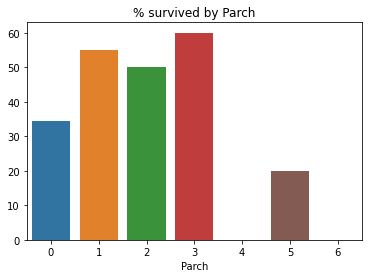

In [15]:
def survived_per_class_relative(df, column):
    data = df.groupby(column)['Survived'].sum()*100/df.groupby(column)['Survived'].count()
    sns.barplot(x = data.index,y = data.values)
    plt.title('% survived by '+ column)
    plt.show()
    
survived_per_class_relative(df_train,'Sex')
survived_per_class_relative(df_train,'Pclass')
survived_per_class_relative(df_train,'Embarked')
survived_per_class_relative(df_train,'SibSp')
survived_per_class_relative(df_train,'Parch')

In [16]:
df_train.groupby('Embarked').Fare.mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

   It is clear that women and passangers in higher classes had a bigger chance of survival, especially women. 
   Also, more than half of the passangers from from Cherbourg survived, which might be explained by the fact that their mean Fare was higher,although this logic does'nt apply to the other two embarkments, because more people from Q survived even though it's mean fare was less than half of S.

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


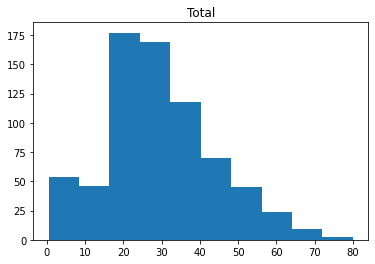

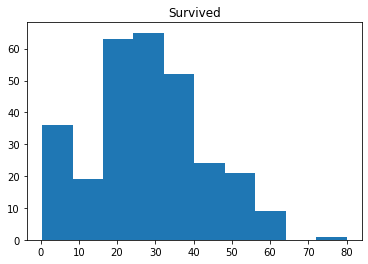

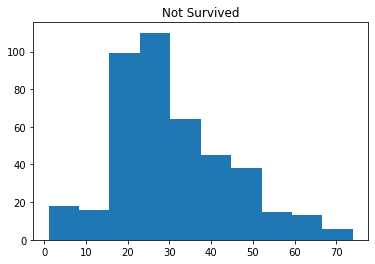

In [17]:
def hist_age(df,title):
    plt.hist(df['Age'])
    plt.title(title)
    plt.show()

for i,j in zip([df_train,df_survived,df_not_survived], ['Total','Survived','Not Survived']):
    hist_age(i,j)

In the same way as women, children were given preference on the boats, thus a higher pct of them survived. In the opposite way, older people had lower survival rate.

In [18]:
df_train.loc[(df_train.Sex == 'male') & (df_train.Age > 16)].Survived.value_counts(normalize=True)

0    0.823383
1    0.176617
Name: Survived, dtype: float64

In [19]:
df_train.loc[(df_train.Sex == 'male') & (df_train.Age < 16)].Survived.value_counts(normalize=True)

1    0.525
0    0.475
Name: Survived, dtype: float64

In [20]:
df_train.loc[(df_train.Sex == 'female') & (df_train.Age > 16)].Survived.value_counts(normalize=True)

1    0.773585
0    0.226415
Name: Survived, dtype: float64

In [21]:
df_train.loc[(df_train.Sex == 'female') & (df_train.Age < 16)].Survived.value_counts(normalize=True)

1    0.651163
0    0.348837
Name: Survived, dtype: float64

It is interesting to notice that, while male children survived at a way higher pct than male adults, the opposite happens when females are analyzed, although without such a big difference.

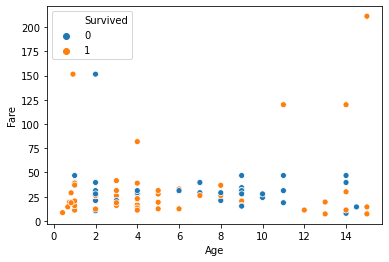

In [22]:
df_young = df_train.query('Age < 16')

sns.scatterplot(x = df_young.Age, y = df_young.Fare, hue = df_young.Survived)

In [23]:
#Obtain only the cabin level
import numpy as np


for df in datasets:
    df.Cabin.fillna('U', inplace=True)
    for i in range(len(df)):
        df.Cabin.iloc[i] = df.Cabin.iloc[i][0]

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


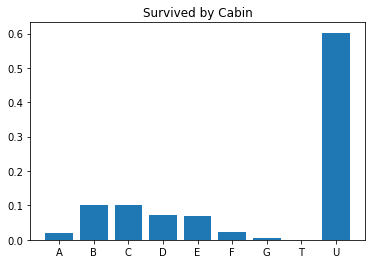

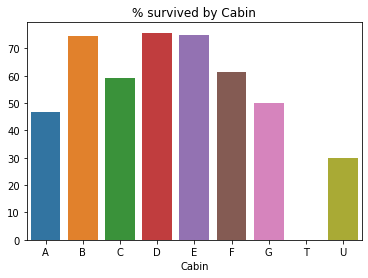

In [24]:
survived_per_class('Cabin')
survived_per_class_relative(df_train,'Cabin')

As seen before, in this dataset, passangers who had cabins had a much higher survival chance than the ones who did not, even though the last ones were the majority in the cruise.

Treating the data

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [27]:
df_unknown = df_train.loc[np.isnan(df_train.Age) == True]

In [28]:
df_unknown.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [29]:
df_unknown.Survived.value_counts(normalize=True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [30]:
df_unknown.Pclass.value_counts(normalize=True)

3    0.768362
1    0.169492
2    0.062147
Name: Pclass, dtype: float64

76% of the people with no age registered are from the third class, which means they paid lower fares. 177 passengers is an amount of data too valuable to be thrown off, so the missing ages will be filled with the median age of the passangers.

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

for df in datasets:
    mice_imputer = IterativeImputer()
    df['Age'] = mice_imputer.fit_transform(df[['Age']])

In [32]:
df_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [33]:
df_train.query("Cabin == 'T'") 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [34]:
df_train.Cabin.replace('T','U',inplace=True)

In [35]:
df_train['Embarked'].fillna('S', inplace=True)

df_test['Fare'].fillna(df_test.Fare.median(), inplace=True)

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [38]:
#Feature Engineering

df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,U,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,U,S


In [39]:
#separe features and result

y = df_train['Survived']
x = df_train.iloc[:,1:]

datasets = [x, df_test]

In [40]:
for df in datasets:
    df['Family'] = df['SibSp'] + df['Parch']

In [41]:
df_corr = pd.concat([x,y],axis=1)
df_corr.corr().Survived.sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
Family      0.016639
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

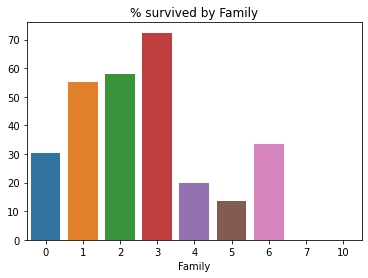

In [42]:
survived_per_class_relative(df_corr,'Family')

In [43]:
for dataset in datasets:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [44]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,U,Q,0,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,U,S,1,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,U,Q,0,Mr
895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,U,S,0,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,U,S,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,U,S,0,Mr
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,C,0,Rare
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,U,S,0,Mr


In [45]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S,1,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,1,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S,0,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,1,Mrs
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,U,S,0,Rare
888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,0,Miss
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,U,S,3,Miss


In [46]:
col_drop = ['Ticket', 'Name','Family','Parch','SibSp']

x.drop(columns = col_drop, inplace=True)
df_test.drop(columns = col_drop, inplace=True)

In [47]:
df_corr = pd.concat([x,y],axis=1)
df_corr.corr().Survived.sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


def encode_features(cat, data):
    transformer = ColumnTransformer([('encoder', OneHotEncoder(), cat)], remainder='passthrough')
    data = transformer.fit_transform(data)
    return pd.DataFrame(data)

cat = ['Pclass','Sex','Cabin','Embarked','Title']

df_test = encode_features(cat, df_test)
x = encode_features(cat,x)

Preprocessing

In [49]:
#split train and val data

from sklearn.model_selection import train_test_split

random_state = 42

x_train, x_val, y_train, y_val = train_test_split(x, y)

In [50]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
662,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,47.000000,25.5875
492,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,55.000000,30.5000
100,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,28.000000,7.8958
485,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.699118,25.4667
689,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,15.000000,211.3375


In [51]:
x_val.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
401,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,26.0,8.050
68,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,17.0,7.925
242,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29.0,10.500
357,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,38.0,13.000
683,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,14.0,46.900


In [52]:
#Scale the data

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
df_test = scaler.transform(df_test)

In [53]:
#Choose model

from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix
random_state = 42

scoring = ('f1', 'roc_auc', 'accuracy')

def best_model(estimator, x, y, scoring):
    crossval = cross_validate(estimator(),x,y, scoring=scoring, cv=10, return_train_score=True)
    print('_________________________________________')
    print(estimator)
    print('Test:')
    print(f"F1: {crossval['test_f1'].mean()}")
    print(f"Roc_auc: {crossval['test_roc_auc'].mean()}")
    print(f"Accuracy: {crossval['test_accuracy'].mean()}")
    print('Train:')
    print(f"F1: {crossval['train_f1'].mean()}")
    print(f"Roc_auc: {crossval['train_roc_auc'].mean()}")
    print(f"Accuracy: {crossval['train_accuracy'].mean()}")
    
estimators= [SVC, XGBClassifier, RandomForestClassifier, LogisticRegression]

for estimator in estimators:    
    best_model(estimator, x_train, y_train, scoring)
    

_________________________________________
<class 'sklearn.svm._classes.SVC'>
Test:
F1: 0.721034972567244
Roc_auc: 0.8588147949611364
Accuracy: 0.8099954771596563
Train:
F1: 0.7847144282032105
Roc_auc: 0.8957806957258521
Accuracy: 0.8537921293967419
_________________________________________
<class 'xgboost.sklearn.XGBClassifier'>
Test:
F1: 0.7552595693347541
Roc_auc: 0.8629073528097919
Accuracy: 0.823405698778833
Train:
F1: 0.9760079865657026
Roc_auc: 0.9988430035147179
Accuracy: 0.9822026965025069
_________________________________________
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Test:
F1: 0.7485068298075596
Roc_auc: 0.8664088269454122
Accuracy: 0.81438263229308
Train:
F1: 0.9886680659661626
Roc_auc: 0.999351115609113
Accuracy: 0.99151663064328
_________________________________________
<class 'sklearn.linear_model._logistic.LogisticRegression'>
Test:
F1: 0.7415422339936872
Roc_auc: 0.8580067899580095
Accuracy: 0.8098824061510628
Train:
F1: 0.7679684416706953
Roc_auc: 0.

In [54]:
#Tuning
from sklearn.model_selection import GridSearchCV


random_state = 42

def tuning(estimator,param_grid, x, y):
    gridsearch = GridSearchCV(estimator, param_grid)
    gridsearch.fit(x,y)
    print(gridsearch.best_params_)
    print(gridsearch.best_score_)

estimator = XGBClassifier()
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

tuning(estimator, param_grid, x_train, y_train)

{'max_depth': 5, 'min_child_weight': 5}
0.8397822915497699


In [55]:
#Tuning 2

estimator = XGBClassifier(max_depth = 5, min_child_weight = 3)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

tuning(estimator, param_grid, x_train, y_train)

{'gamma': 0.3}
0.838289754236337


In [56]:
#Tuning 3

estimator = XGBClassifier(max_depth = 5, min_child_weight = 5, gamma = 0)

param_grid = {
 'learning_rate':[0.01, 0.03, 0.1, 0.03, 1]
}

tuning(estimator, param_grid, x_train, y_train)

{'learning_rate': 0.1}
0.8397486252945796


In [57]:
#train model

model_xgb = XGBClassifier(max_depth = 5, min_child_weight = 3, gamma = 0, learning_rate = 0.1)
model_xgb.fit(x_train,y_train)
y_predict_xgb = model_xgb.predict(x_val)

In [58]:
#Evaluate

def evaluate_model(y_val, y_predict):
    print(f"Accuracy: {accuracy_score(y_val, y_predict)}")
    print(f"F1: {f1_score(y_val, y_predict)}")
    print(f"Roc_auc: {roc_auc_score(y_val, y_predict)}")
    print(f"Confusion Matrix: {confusion_matrix(y_val, y_predict)}")
    

evaluate_model(y_val,y_predict_xgb)

Accuracy: 0.820627802690583
F1: 0.7752808988764045
Roc_auc: 0.810939060939061
Confusion Matrix: [[114  18]
 [ 22  69]]
